In [1]:
import pandas as pd
import nltk
import nltk_data
from bs4 import BeautifulSoup
import string
import re
import numpy as np
from collections import Counter
from nltk import tokenize
import matplotlib.pyplot as plt
from keras import layers

Using TensorFlow backend.


In [2]:
#df=pd.read_csv("C:\\Users\\Milgram\\Desktop\\POC\\train.tsv")
train_df=pd.read_csv('C:\\Users\\Milgram\\Downloads\\train.csv\\train.csv')

In [3]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
#In this step we will remove all null values
train_df.dropna(inplace=True)
train_df.isna().sum()

Id                0
Province_State    0
Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [5]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
888,913,Australian Capital Territory,Australia,2020-01-22,0.0,0.0
889,914,Australian Capital Territory,Australia,2020-01-23,0.0,0.0
890,915,Australian Capital Territory,Australia,2020-01-24,0.0,0.0
891,916,Australian Capital Territory,Australia,2020-01-25,0.0,0.0
892,917,Australian Capital Territory,Australia,2020-01-26,0.0,0.0


In [6]:
train_df.shape

(14763, 6)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14763 entries, 888 to 33743
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              14763 non-null  int64  
 1   Province_State  14763 non-null  object 
 2   Country_Region  14763 non-null  object 
 3   Date            14763 non-null  object 
 4   ConfirmedCases  14763 non-null  float64
 5   Fatalities      14763 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 807.4+ KB


In [35]:
train = train_df.groupby(['Date'],as_index=False).agg({'ConfirmedCases':'sum'})
train.head()

,Date,ConfirmedCases
0,2020-01-22,548.0
1,2020-01-23,643.0
2,2020-01-24,920.0
3,2020-01-25,1406.0
4,2020-01-26,2080.0


In [40]:
train_input = train.iloc[:, 1:3].values

In [41]:
train_input.shape

(111, 1)

In [46]:
#train["Date"] = train_df["Date"].astype("float")

In [53]:
#Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

#Creating data structure with 30 timesteps 
X_train = []
y_train = []
for i in range(30,111):
    X_train.append(train_scaled[i-30:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)   

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

#Add first LSTM layer and Dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding second layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding third layer
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding fourth layer
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Training the model
regressor.fit(X_train, y_train, epochs = 50, batch_size = 5)

Epoch 1/50
81/81 [==============================] - 2s 27ms/step - loss: 0.0867
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 3/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 5/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 6/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 7/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 8/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 9/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 10/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 11/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 12/50
81/81 [==============================] - 0s 5ms/step - loss: 0.0039A: 0s - loss: 0.0
Epoch 13/50
81/81 [============

In [55]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [56]:
test_df=pd.read_csv('C:\\Users\\Milgram\\Downloads\\test.csv')
test_df.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [57]:
real_confirmed_cases = rnn.iloc[45:111,0:1].values

X_test = []

for i in range(45,111):
    X_test.append(train_scaled[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)

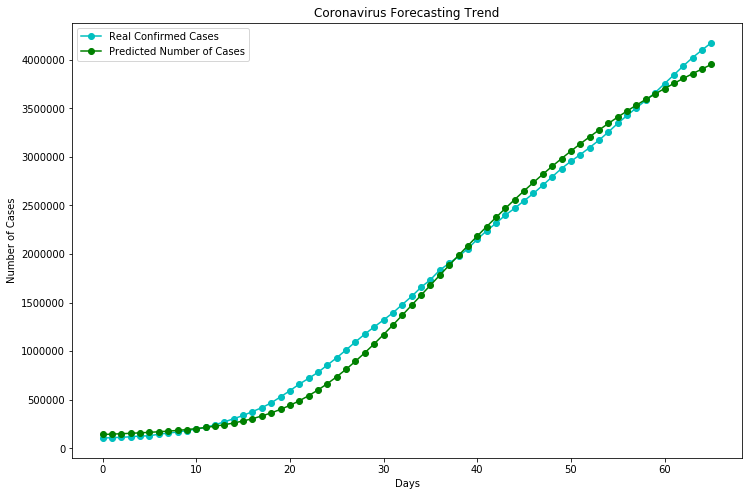

In [58]:
plt.figure(figsize = (12,8))
plt.plot(real_confirmed_cases, color='c',marker = 'o', label = 'Real Confirmed Cases')
plt.plot(predicted_confirmed_cases, color='g',marker = 'o', label = 'Predicted Number of Cases')
plt.title('Coronavirus Forecasting Trend')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

--------------------------------------------Practice-------------------------------------

In [48]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
#df=pd.read_csv("C:\\Users\\Milgram\\Desktop\\POC\\train.tsv")
train_df=pd.read_csv('C:\\Users\\Milgram\\Downloads\\train.csv\\train.csv')

In [50]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [51]:
train_df.shape

(34743, 6)

In [52]:
train_df.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [53]:
train_df.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [54]:
train = train_df.groupby(['Date'],as_index=False).agg({'ConfirmedCases':'sum'})

In [55]:
train.head()

,Date,ConfirmedCases
0,2020-01-22,554.0
1,2020-01-23,653.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [56]:
train = train.iloc[:, 1:2].values

In [57]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [58]:
# Creating a data structure with 14 timesteps and 1 output
X_train = []
y_train = []
for i in range(14, 103):
    X_train.append(train_scaled[i-14:i, 0])
    y_train.append(train_scaled[i, 0])
        
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [59]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [61]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

In [65]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (89, 14)

In [ ]:
# Part 3 - Making the predictions and visualising the results
dataset_train_input = dataset_train.groupby(['Date'],as_index=False).agg({'ConfirmedCases':'sum'})
dataset_train_input = dataset_train_input.iloc[:,1:2]
real_confirmed_cases = dataset_train_input[104:].values
inputs = dataset_train_input[104 - 14:].values
inputs = sc.transform(inputs)
X_test = []
for i in range(14, 21):
    X_test.append(inputs[i-14:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases = sc.inverse_transform(predicted_confirmed_cases)


In [ ]:
# Visualising the results
plt.plot(real_confirmed_cases, color = 'red', marker = 'o', label = 'real_confirmed_cases')
plt.plot(predicted_confirmed_cases, color = 'blue', marker = 'o', label = 'predicted_confirmed_cases')
plt.title('Confirmed Cases Prediction For Last 7 Days')
plt.xlabel('Days')
plt.ylabel('Sum of Confirmed Cases of Countries')
plt.legend()
plt.show()

In [8]:
test_df=pd.read_csv('C:\\Users\\Milgram\\Downloads\\test.csv')

In [9]:
test_df.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [10]:
#In this step we will remove all null values
test_df.dropna(inplace=True)
test_df.isna().sum()

ForecastId        0
Province_State    0
Country_Region    0
Date              0
dtype: int64

In [11]:
test_df.head()

,ForecastId,Province_State,Country_Region,Date
344,345,Australian Capital Territory,Australia,2020-04-02
345,346,Australian Capital Territory,Australia,2020-04-03
346,347,Australian Capital Territory,Australia,2020-04-04
347,348,Australian Capital Territory,Australia,2020-04-05
348,349,Australian Capital Territory,Australia,2020-04-06


In [12]:
test_df.shape

(5719, 4)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 344 to 13071
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      5719 non-null   int64 
 1   Province_State  5719 non-null   object
 2   Country_Region  5719 non-null   object
 3   Date            5719 non-null   object
dtypes: int64(1), object(3)
memory usage: 223.4+ KB


In [43]:
train_df["ConfirmedCases"] = train_df["ConfirmedCases"].astype("float")
train_df["Fatalities"] = train_df["Fatalities"].astype("float")
#The country_region got modified in the enriched dataset by @optimo, 
# so we have to apply the same change to this Dataframe to facilitate the merge.
train_df["Country_Region"] = [ row.Country_Region.replace("'","").strip(" ") if row.Province_State=="" else str(row.Country_Region+"_"+row.Province_State).replace("'","").strip(" ") for idx,row in train_df.iterrows()]

In [25]:
#train_df = train_df.merge(extra_data_df, how="left", on=['Country_Region','Date']).drop_duplicates()
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,date,month_year
888,913,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-22,0.0,0.0,2020-01-22,2020-01
889,914,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-23,0.0,0.0,2020-01-23,2020-01
890,915,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-24,0.0,0.0,2020-01-24,2020-01
891,916,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-25,0.0,0.0,2020-01-25,2020-01
892,917,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-26,0.0,0.0,2020-01-26,2020-01


In [26]:
train_df['Date'].value_counts()

2020-04-17    133
2020-03-02    133
2020-02-12    133
2020-04-02    133
2020-02-05    133
             ... 
2020-04-15    133
2020-03-12    133
2020-03-15    133
2020-04-09    133
2020-02-04    133
Name: Date, Length: 111, dtype: int64

In [27]:
train_df['Country_Region'].value_counts()

US_Illinois                       111
Canada_British Columbia           111
US_Colorado                       111
China_Chongqing                   111
United Kingdom_Channel Islands    111
                                 ... 
Canada_New Brunswick              111
US_Arizona                        111
US_New Mexico                     111
China_Macau                       111
US_Louisiana                      111
Name: Country_Region, Length: 133, dtype: int64

In [28]:
train_df['date']=pd.to_datetime(train_df['Date'])
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,date,month_year
888,913,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-22,0.0,0.0,2020-01-22,2020-01
889,914,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-23,0.0,0.0,2020-01-23,2020-01
890,915,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-24,0.0,0.0,2020-01-24,2020-01
891,916,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-25,0.0,0.0,2020-01-25,2020-01
892,917,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-26,0.0,0.0,2020-01-26,2020-01


In [29]:
train_df['month_year'] = pd.to_datetime(train_df['Date']).dt.to_period('M')
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,date,month_year
888,913,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-22,0.0,0.0,2020-01-22,2020-01
889,914,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-23,0.0,0.0,2020-01-23,2020-01
890,915,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-24,0.0,0.0,2020-01-24,2020-01
891,916,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-25,0.0,0.0,2020-01-25,2020-01
892,917,Australian Capital Territory,Australia_Australian Capital Territory,2020-01-26,0.0,0.0,2020-01-26,2020-01


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14763 entries, 888 to 33743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              14763 non-null  int64         
 1   Province_State  14763 non-null  object        
 2   Country_Region  14763 non-null  object        
 3   Date            14763 non-null  object        
 4   ConfirmedCases  14763 non-null  float64       
 5   Fatalities      14763 non-null  float64       
 6   date            14763 non-null  datetime64[ns]
 7   month_year      14763 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 1.6+ MB


In [31]:
train_df['month_year'].value_counts()

2020-03    4123
2020-04    3990
2020-02    3857
2020-05    1463
2020-01    1330
Freq: M, Name: month_year, dtype: int64

In [33]:
import calendar
print(train_df['date'][1],'Day', calendar.day_name[train_df['date'][1].weekday()])

In [22]:
train_df.shape

(14763, 8)

In [23]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,date,month_year
888,913,Australian Capital Territory,Australia,2020-01-22,0.0,0.0,2020-01-22,2020-01
889,914,Australian Capital Territory,Australia,2020-01-23,0.0,0.0,2020-01-23,2020-01
890,915,Australian Capital Territory,Australia,2020-01-24,0.0,0.0,2020-01-24,2020-01
891,916,Australian Capital Territory,Australia,2020-01-25,0.0,0.0,2020-01-25,2020-01
892,917,Australian Capital Territory,Australia,2020-01-26,0.0,0.0,2020-01-26,2020-01


In [50]:
rnn = train_df.groupby(['Date']).agg({'ConfirmedCases':'sum','Fatalities':'sum'})

In [51]:
rnn 

,ConfirmedCases,Fatalities
Date,,
2020-01-22,554.0,17.0
2020-01-23,653.0,18.0
2020-01-24,939.0,26.0
2020-01-25,1432.0,42.0
2020-01-26,2113.0,56.0
...,...,...
2020-05-07,3845043.0,269543.0
2020-05-08,3937319.0,274872.0
2020-05-09,4023170.0,279277.0


In [52]:
train = rnn.iloc[:,0:1].values

In [ ]:
#Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

#Creating data structure with 30 timesteps 
X_train = []
y_train = []
for i in range(30,111):
    X_train.append(train_scaled[i-30:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)   

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

#Creating data structure with 30 timesteps 
X_train = []
y_train = []
for i in range(30,111):
    X_train.append(train_scaled[i-30:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)   

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))